In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-05.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

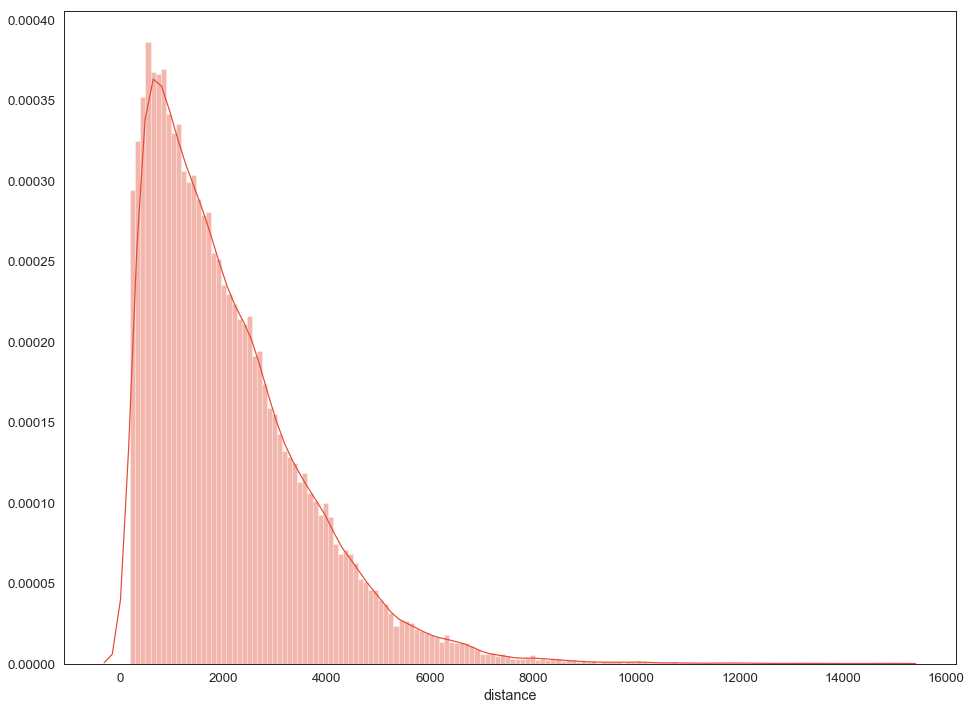

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [5]:
distance = df["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,3946.843912,-1.703860e+06,inf,5.855994e-09
gamma,3588.650350,-1.638157e+06,inf,1.855717e-08
burr,3458.255376,-1.547243e+06,inf,9.149939e-08
norm,5616.096396,-1.464136e+06,inf,3.936157e-07
lognorm,3584.051834,-1.354947e+06,inf,2.674777e-06


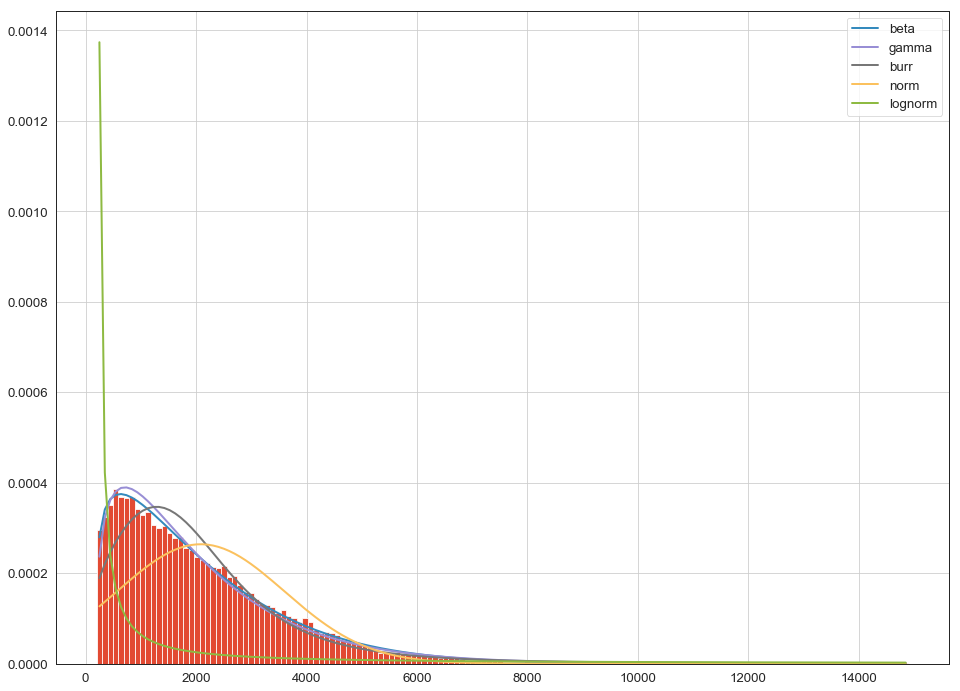

In [6]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=150)
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.2309551589719079,
  10.028228658161009,
  198.85945439677675,
  17222.80889974843)}

In [8]:
f.get_best(method = 'aic')

{'burr': (3.075573410364729,
  0.4821077788041548,
  -13.756824236691376,
  2593.0264472968665)}

In [9]:
f.get_best(method = 'bic')

{'beta': (1.2309551589719079,
  10.028228658161009,
  198.85945439677675,
  17222.80889974843)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,3946.843912,-1.703860e+06,inf,5.855994e-09
burr,3458.255376,-1.547243e+06,inf,9.149939e-08
norm,5616.096396,-1.464136e+06,inf,3.936157e-07
alpha,3294.120357,-1.432048e+06,inf,6.911637e-07
bradford,2905.872253,-1.407512e+06,inf,1.063189e-06


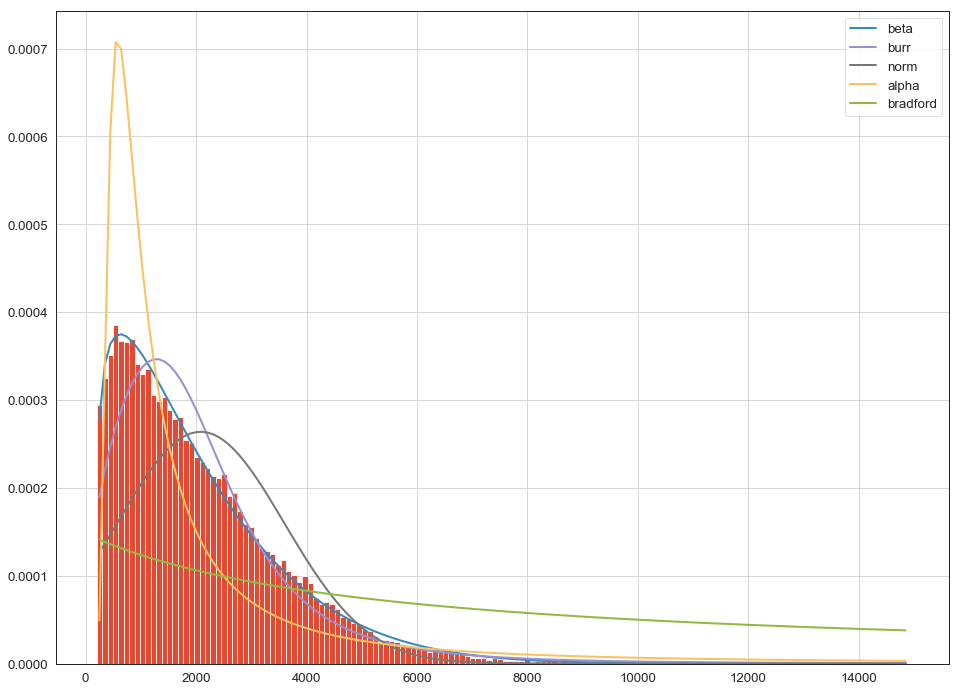

In [10]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,4213.924232,-1.636465e+06,inf,1.911648e-08
expon,3436.947189,-1.525918e+06,inf,1.330889e-07
dgamma,4128.874530,-1.473419e+06,inf,3.343725e-07
cosine,3119.075808,-1.391024e+06,inf,1.420271e-06
chi2,392720.556853,-1.359183e+06,3.546089,2.483138e-06


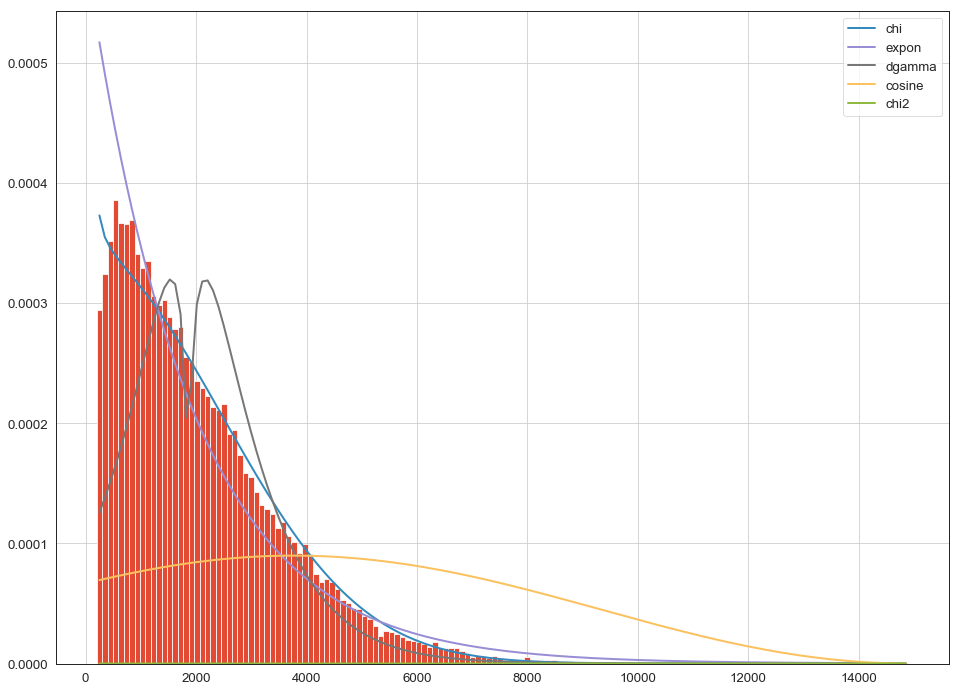

In [11]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,3588.650350,-1.638157e+06,inf,1.855717e-08
exponnorm,3465.529890,-1.547536e+06,inf,9.104855e-08
f,3456.622212,-1.534034e+06,inf,1.153730e-07
fisk,3349.776959,-1.529070e+06,inf,1.259010e-07
fatiguelife,3304.543691,-1.413254e+06,inf,9.612590e-07


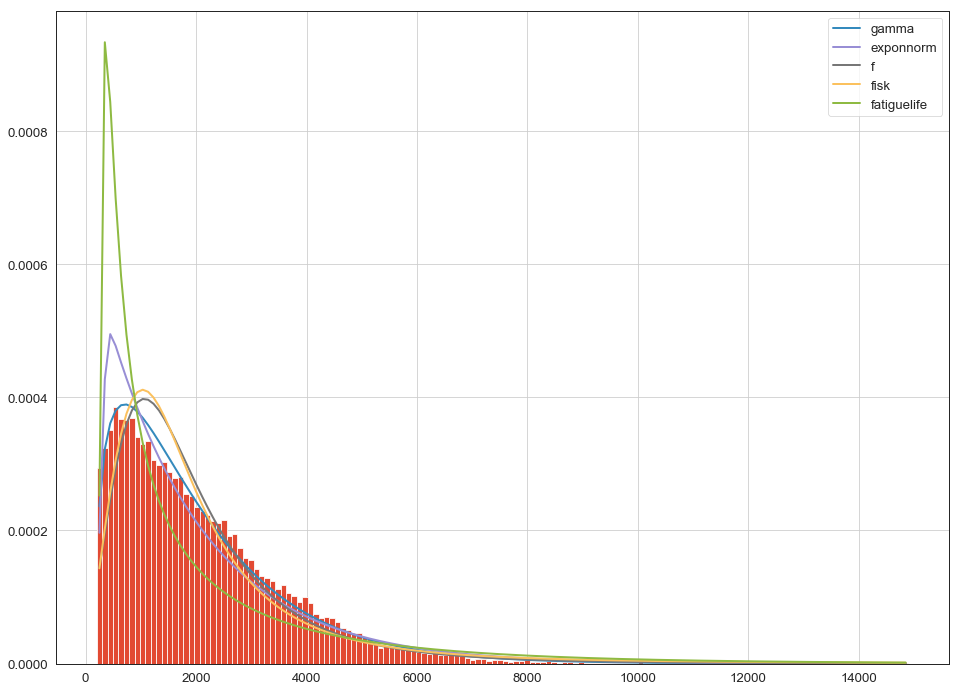

In [12]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
genexpon,3426.983509,-1.519544e+06,inf,1.487550e-07
loggamma,5566.581766,-1.463327e+06,inf,3.991729e-07
levy,3198.743522,-1.457190e+06,inf,4.446525e-07
lognorm,3584.051834,-1.354947e+06,inf,2.674777e-06
gengamma,3309.444578,-1.343809e+06,inf,3.251678e-06


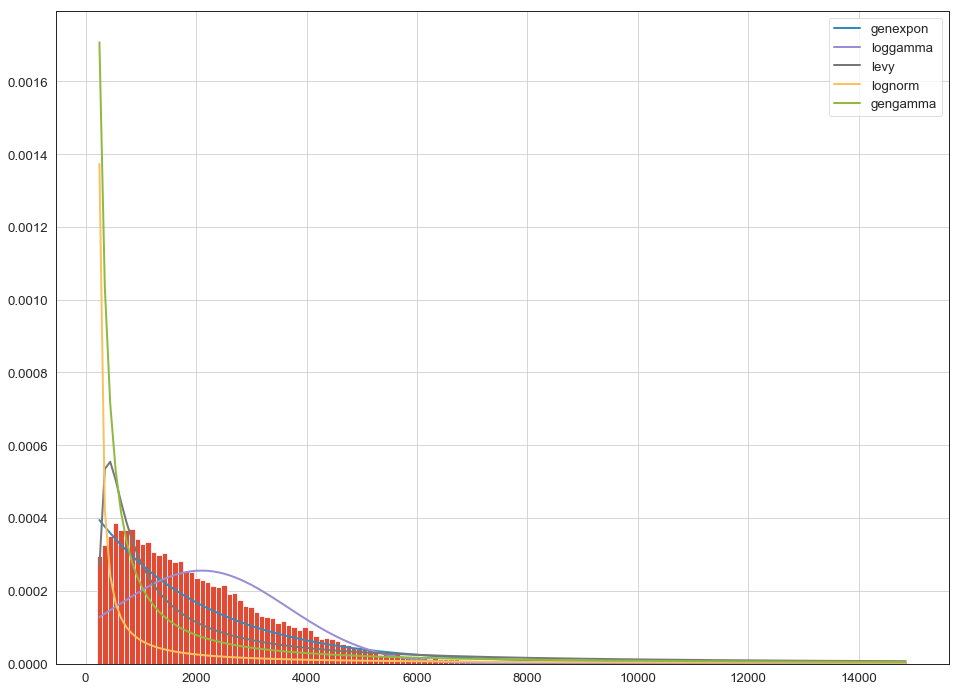

In [13]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,3588.650357,-1.638157e+06,inf,1.855717e-08
t,3901.855417,-1.472512e+06,inf,3.397383e-07
logistic,4206.236612,-1.471925e+06,inf,3.433210e-07
powerlaw,2981.984732,-1.410524e+06,inf,1.008451e-06
pareto,3313.513819,-1.340743e+06,inf,3.432106e-06


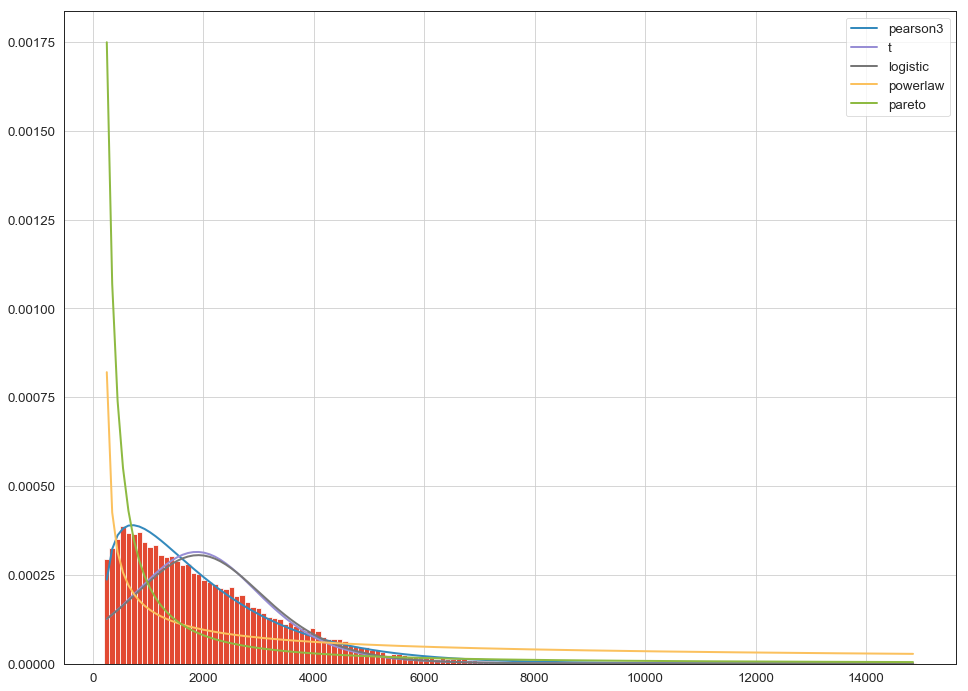

In [14]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins=150)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
beta,3946.843912,-1.703860e+06,inf,5.855994e-09
gamma,3588.650350,-1.638157e+06,inf,1.855717e-08
pearson3,3588.650357,-1.638157e+06,inf,1.855717e-08
chi,4213.924232,-1.636465e+06,inf,1.911648e-08
gengamma,3309.444578,-1.343809e+06,inf,3.251678e-06


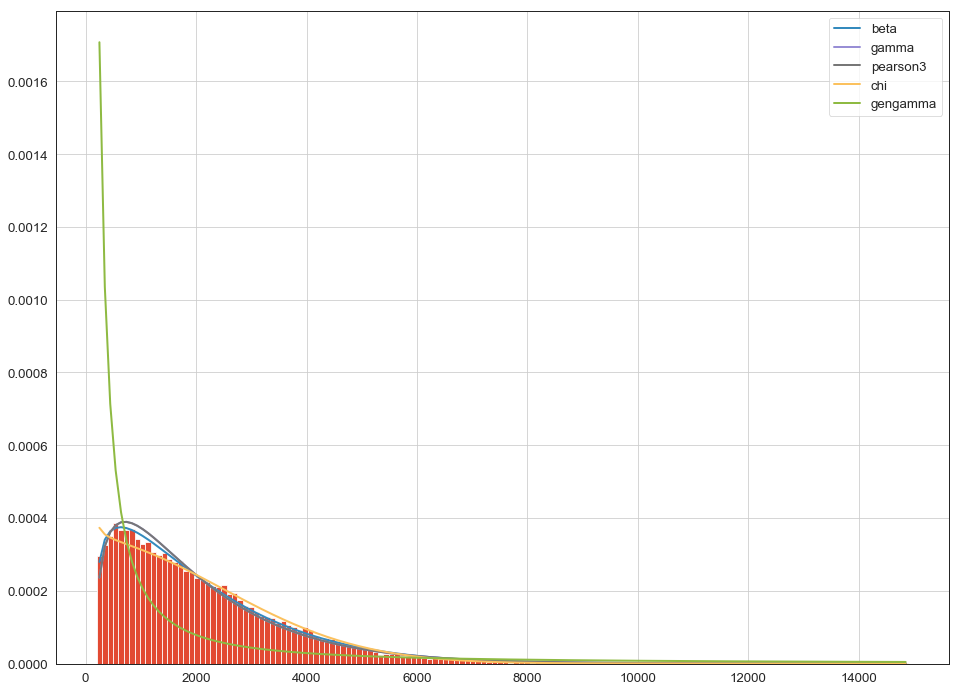

In [15]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma', 'gengamma', 'pearson3'], bins=150)

f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

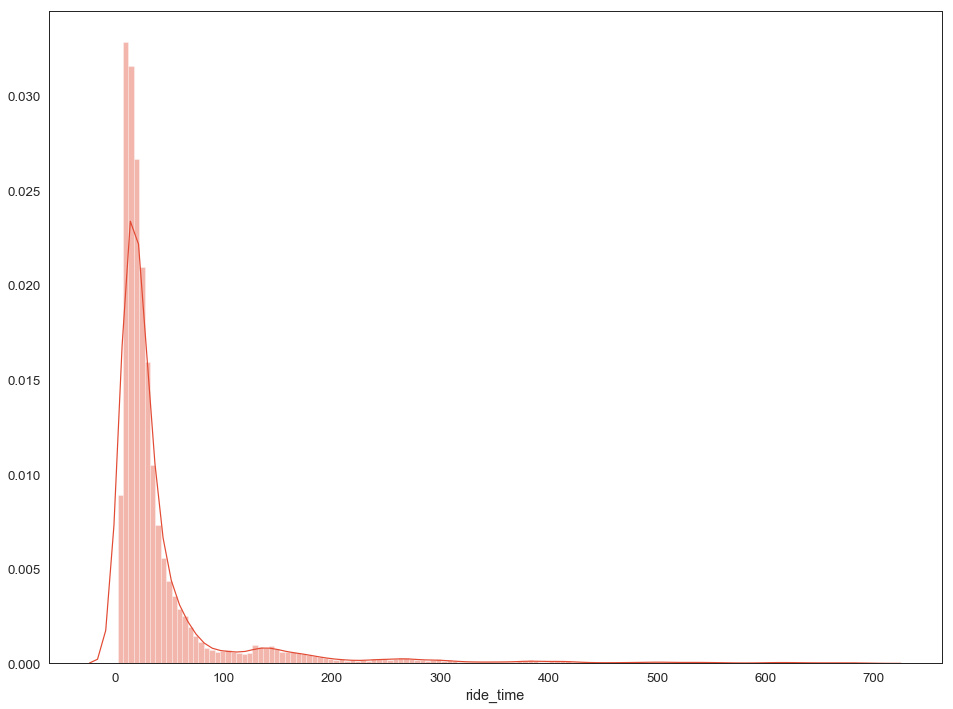

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 140)

In [17]:
rides = df["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
burr,2558.610363,-1.195794e+06,0.021333,0.000044
lognorm,2712.757824,-1.104853e+06,0.073036,0.000216
gamma,3117.280785,-1.018195e+06,0.242018,0.000987
beta,3107.537530,-1.017398e+06,0.245510,0.001000
norm,4583.208192,-9.633928e+05,0.822783,0.002582


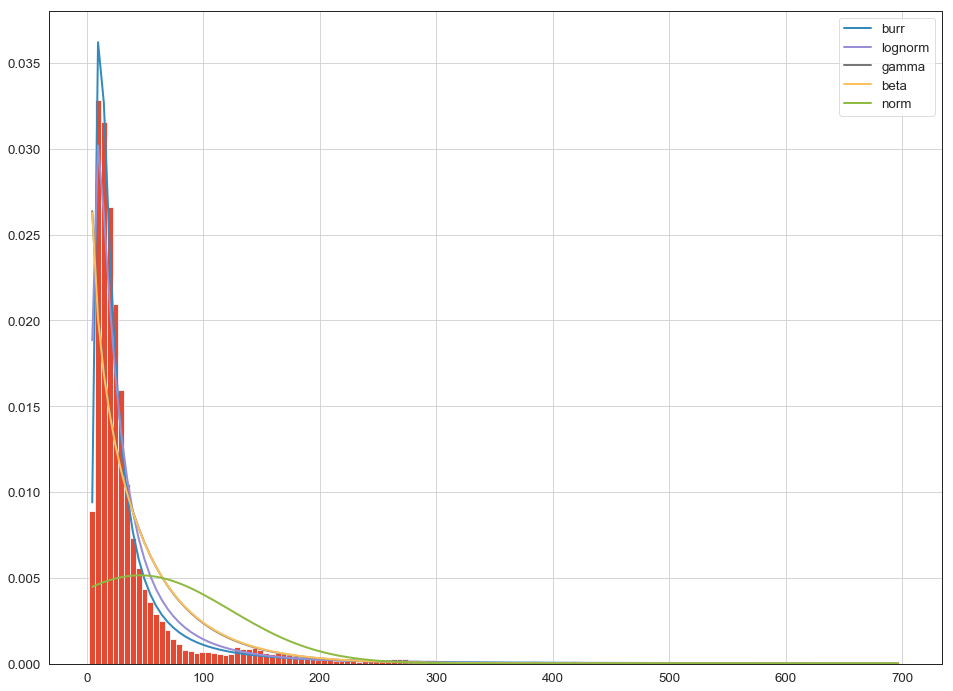

In [18]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins = 140)
f.fit()
f.summary()

In [19]:
f.get_best(method = 'sumsquare_error')

{'burr': (1.3491046020683637,
  9.070179322342405,
  0.3573991724594472,
  3.2119722633255794)}

In [20]:
f.get_best(method = 'aic')

{'burr': (1.3491046020683637,
  9.070179322342405,
  0.3573991724594472,
  3.2119722633255794)}

In [21]:
f.get_best(method = 'bic')

{'burr': (1.3491046020683637,
  9.070179322342405,
  0.3573991724594472,
  3.2119722633255794)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
burr,2558.610363,-1.195794e+06,0.021333,0.000044
alpha,2470.490382,-1.110016e+06,0.033469,0.000197
beta,3107.537530,-1.017398e+06,0.245510,0.001000
norm,4583.208192,-9.633928e+05,0.822783,0.002582
bradford,1924.010028,-9.622296e+05,1.195398,0.002635


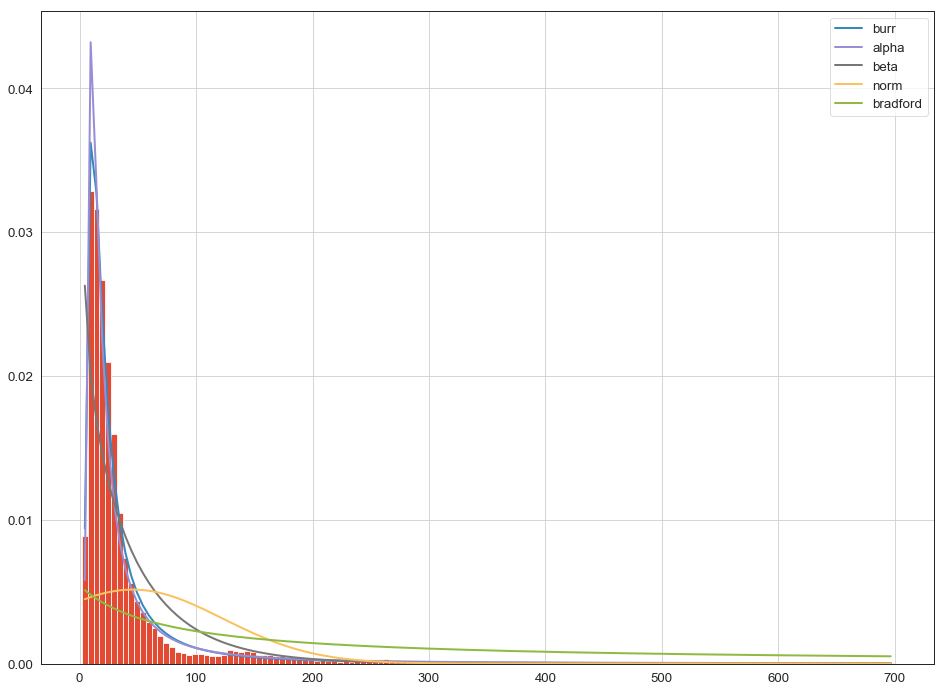

In [22]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
dgamma,2895.695687,-1.026376e+06,0.098375,0.000855
expon,3303.900831,-1.026370e+06,0.235056,0.000855
chi2,3111.140824,-1.017937e+06,0.242492,0.000991
chi,3216.906237,-9.908367e+05,0.420533,0.001595
cosine,2094.519931,-9.480193e+05,1.639533,0.003382


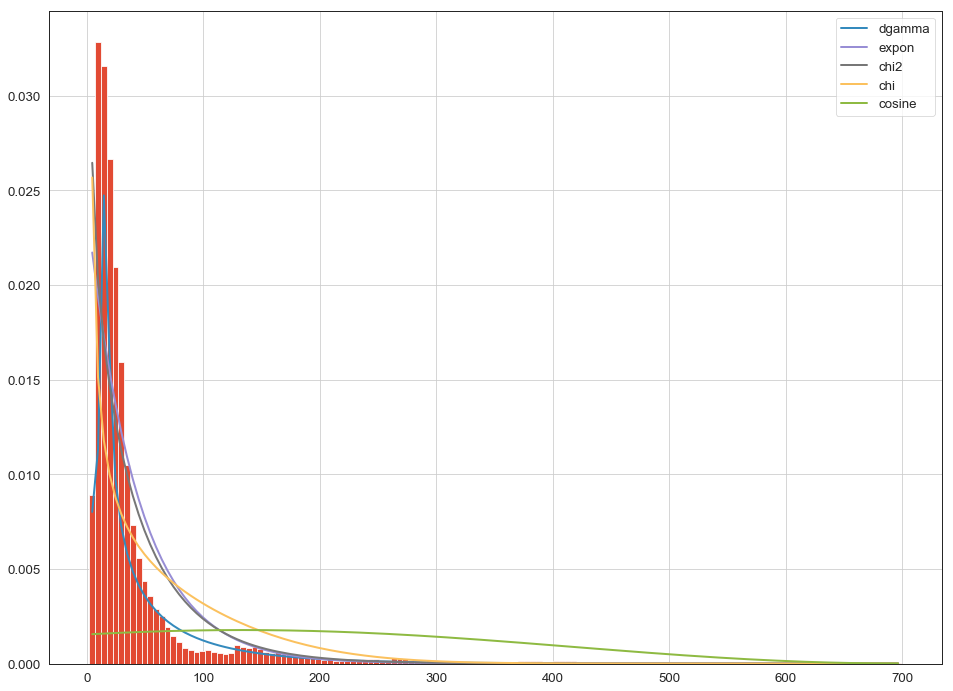

In [23]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
f,2565.671098,-1.190325e+06,0.023586,0.000048
fisk,2674.715406,-1.136186e+06,0.048349,0.000124
fatiguelife,2791.865013,-1.076406e+06,0.121573,0.000355
exponnorm,3420.037070,-1.052970e+06,0.193141,0.000536
gamma,3117.280785,-1.018195e+06,0.242018,0.000987


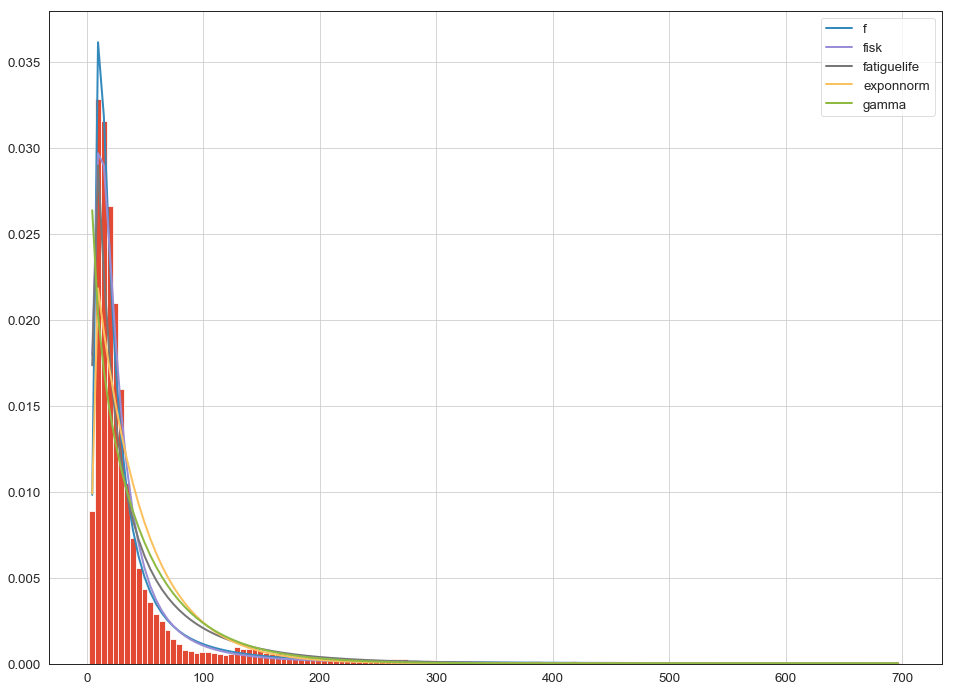

In [24]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,2712.757824,-1.104853e+06,0.073036,0.000216
gengamma,2868.216531,-1.077552e+06,0.106224,0.000348
levy,2243.320653,-1.028288e+06,0.187083,0.000827
genexpon,3309.896383,-1.026337e+06,0.235057,0.000855
loggamma,4546.218658,-9.625743e+05,0.841309,0.002619


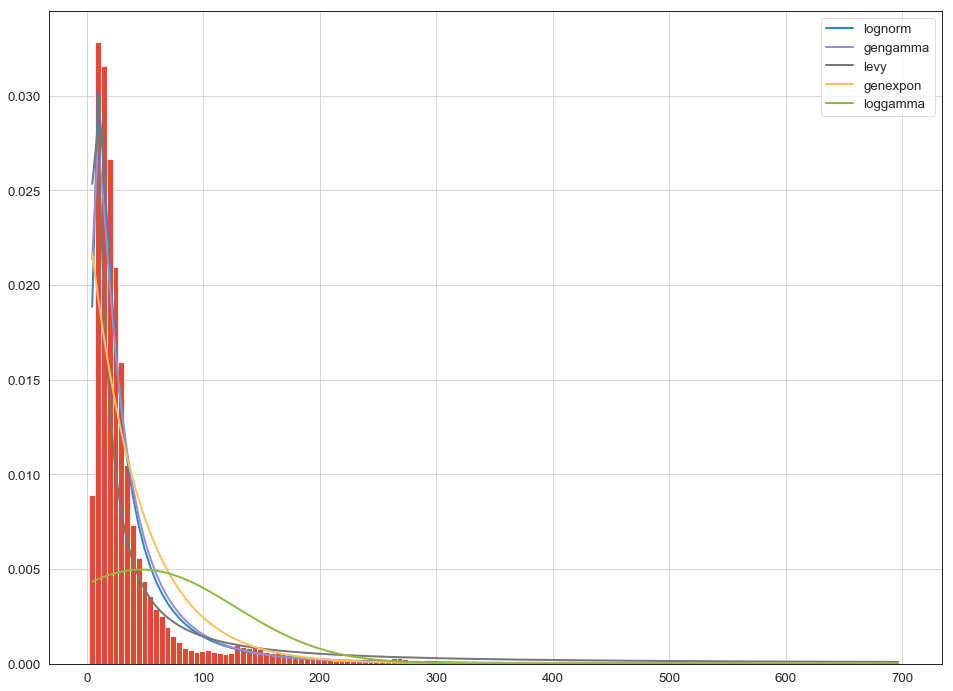

In [25]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,2760.547917,-1.081311e+06,0.069659,0.000326
pearson3,3288.393101,-1.021031e+06,0.228637,0.000939
logistic,4471.647313,-9.864247e+05,0.442380,0.001724
powerlaw,1997.625182,-9.709518e+05,0.857527,0.002261
pareto,2365.520497,-9.343635e+05,0.658589,0.004297


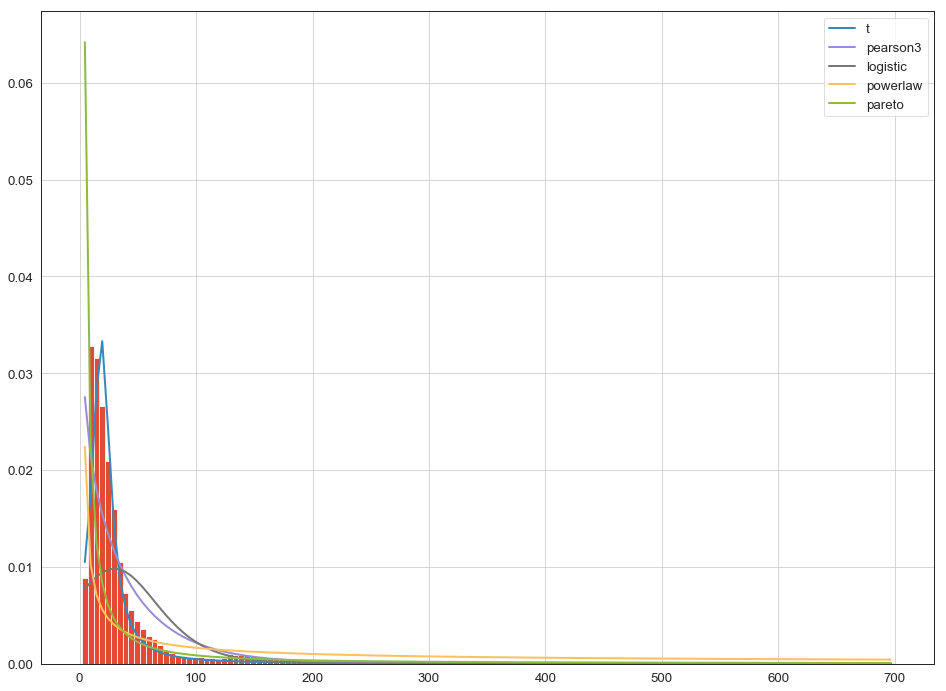

In [26]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 140)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
burr,2558.610363,-1.195794e+06,0.021333,0.000044
f,2565.671098,-1.190325e+06,0.023586,0.000048
alpha,2470.490382,-1.110016e+06,0.033469,0.000197
lognorm,2712.757824,-1.104853e+06,0.073036,0.000216
t,2760.547917,-1.081311e+06,0.069659,0.000326


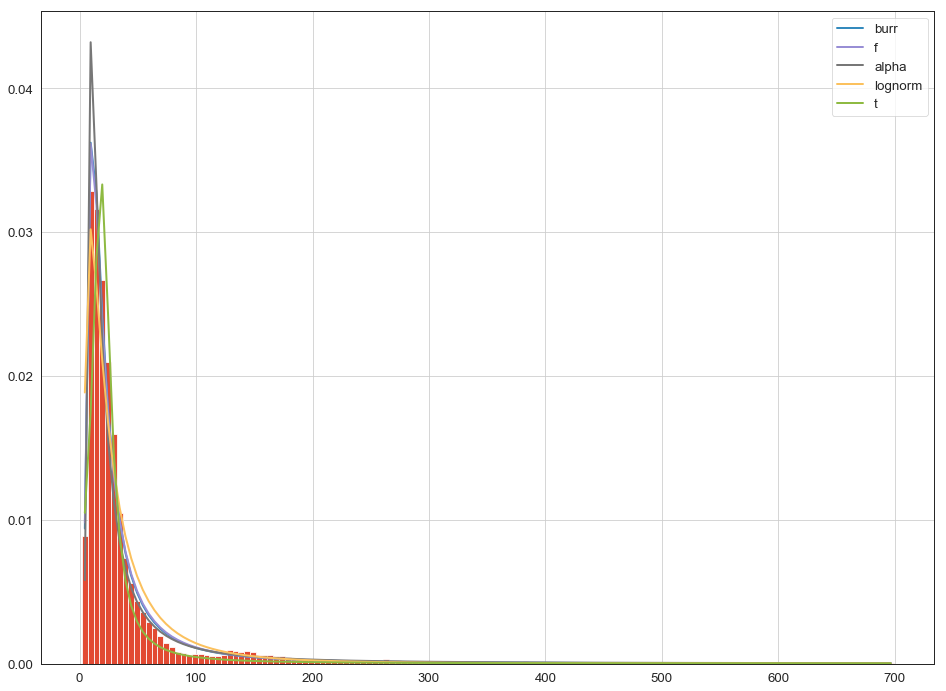

In [27]:
f = Fitter(rides,
           distributions= ['alpha','burr','lognorm', 'f', 't'], bins = 140)
f.fit()
f.summary()